### Linear Regression with single input vector

This notebook is aimed at providing an introduction and to some extent an insight for Linear Regression model with optimization of error function using gradiant descent. If it seems new, don't worry we will go through the basics. Some prior knowledge about python is required but not essential if famililar with software like Matlab.

Scatterplot is a graph which has two or more axes displaying a set of data for the variables. Lets plot a simple scatterplot below with two variables, one output(y), the vertical axis, one input(X), the horizontal axis.

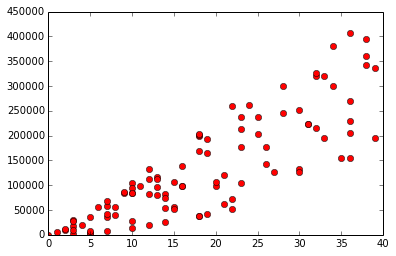

In [26]:
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Image
%matplotlib inline

X = np.random.randint(0, 40, 100)
y = np.asarray([X[i] * np.absolute(np.random.random_integers(X[i], X[i] + 100)) * 100 for i in xrange(len(X))])
plt.plot(X, y, 'ro')
plt.show()

* We imported relevant imports at beginning. `%matplotlib inline` plots the graph in the notebook instead of plotting in a separate window. `np.random.randint(0, 40, 100)` generates a vector of size 100 with values in range `[0, 40]`. `plt.plot()` is similar to matlab function. Complicated `y` looking vector is a function of X. We will see why we didn't just make it into any other random vector.

* In Linear Regression, we find a best line which approximately passes through the mid of the data points. In the above scatter plot we can roughly draw a line through the points which fits the data in best way. You can try sketching a line starting from zero roughly in your mind which looks nice visually.

* Linear Regression is a supervised learning technique. This means we use the both the output(labelled data) and the input data to train(learn) our algorithm. It is a regression meaning our model has a continous or infinite number of possible prediction output.

* I will consider a simple Linear Regression in which we will consider two variables, one output and one input. In multiple variables there are more than one input variables, which in other words means the model has many feature vectors, which describes the output.

### Intuition and theory for Linear Regression
As we are fitting a line to a data set, we need a line equation to construct a line. For a quick reminder a line equation is given by 
$$y = mx + c$$
`m` is the slope, `x` is the x-coordinate and `c` is the intercept of the line. Note that this is a linear equation.
Our objective here is to find the unknown `m` and `c` parameter to construct the best line. In machine learning context `m` and `c` are called the weights or coefficients. Also in general instead of writing as above we will represent it as
$$y = \theta_0 + \theta_1X$$
or
$$y = w_0 + w_1X$$
`X` and `y` represents a vector.
We can find the values for our weights by randomly assigning values to them and observing them visually. This is a feasible idea of smaller data set, however in real life we have much higher dimensions of input and tremonduosly large data set. Therefore to solve it analytically we first need to define a cost function, which will measure the error of the real output `y` and predicted output `y_pred`. `y_pred` can be first calculated by randomly initializing our weight vector. We then try to minimise our cost function by optmising our weights using some optimisation method. We will use a famous algorithm called gradiant descent for optimisation. Lets first define our cost or error function.
$$J(\theta_0, \theta_1) = \sum_{i=1}^n{(y_i - \theta_0 + \theta_1X_i)^2}$$

In english our cost function is sum of the square of the difference of predicted `y` and observed `y`. `y_subscript_i` and `X_subscript_i` in the equation represents `i_th` index of the vector.
We require a bit of calculas to understand how we will minimise the cost function.
The slope of any two points in the graph tells us how `y` is changing wrt to `x`. Here `y = f(x)`. 

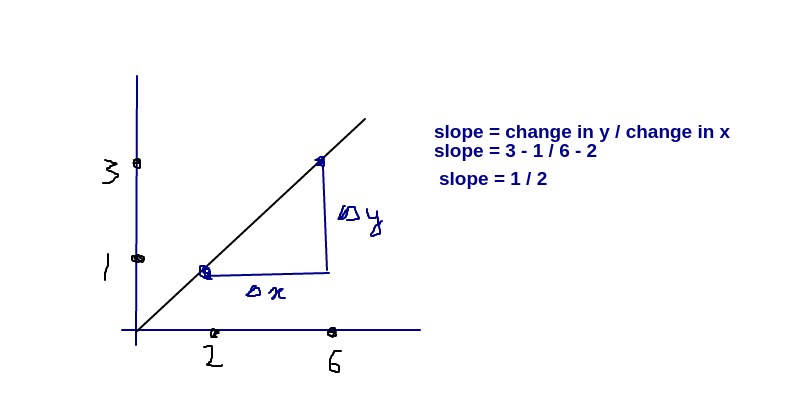

In [31]:
Image('images/derivative.png')

In the above graph we measure the change of y wrt x and the result is called the slope.
In differentiation we find the change in `y` with an infinitesimal small change in `x`. Formally
$$f' = \frac{f(x + \delta x) - f(x)} {\delta x}$$
Therefore the derivative of a function `f'(x)` gives the slope of the function `f(x)` at the point x. The slope at any point of a function is nothing but its tangent. Now our objective is to find weights of the line equation(this is also called hypothesis function) such that our error function is minimised. When the slope is zero, its either a maximum point or a minimum. We therefore differentiate our cost function and equate it to zero. Weights are found in analytical way in this manner.

Solving the equation will allow us to find the local minimum of the error function by plugging the weight value in our hypothesis function. Also note this is a convex function. If global minimum is same as local minimum we call it as convex function. Refer [here](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf) for their properties. However we will not solve for our weights analytically. Mainly because it will be extremely slow to solve the linear equations in higher dimensions and data size. Matrix inverse takes `O(n^3)` time!. Here gradiant descent optmisation algorithm comes to the rescue.

### Gradiant Descent
We know the slope of the graph gives the direction of the curve its moving in. Using that we will move towards the local minimum of the error function plot. If slope is positive we move backward, if negative we move forward.

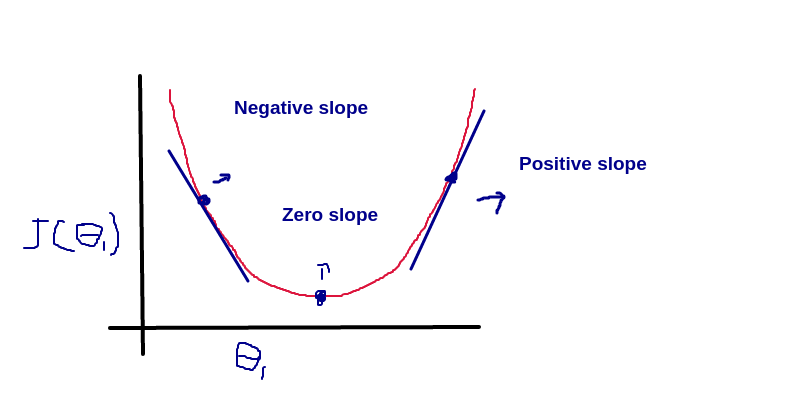

In [33]:
Image('images/slope.png')

In the above graph we consider our cost function to be a parameter of only one variable. Our error function is kind of a bowl, which has a global optimum(minimum) value where slope is 0. Here the error is zero. In gradiant descent, we first randomly assign our weights to some value. Then we find its derivative(slope) and move opposite to its direction to reach the minimum or zero slope. The derivative of `theta_0` and `theta_1` is given by

$$\frac{\delta}{\delta\theta_1} = \frac{2 \sum_{i=1}^n{((\theta_0 + theta_1X_i)}X_i - y_i)} {N}$$


$$\frac{\delta}{\delta\theta_0} = \frac{2 \sum_{i=1}^n{(\theta_0 + theta_1X_i} - y_i)} {N}$$

And gradiant descent updates our weights by formula below.

$$\theta_i = \theta_i - \alpha\frac{\delta}{\delta\theta_i}$$

`theta_i` is 0 and 1, representing the slope and the intercept. `alphta` is the learning rate, which tells the equation on how much to move forward. Moving too slow will make our convergence slow, and moving fast will make our values to reach infinity. We iteratively update our weight value until our line best fits the data. The stopping condition for our algorithm differs by purposes. We can set number of iterations, time, some minimum change in 'old' and 'new' `theta` values. We will now use LinearRegression to fit and sample data and then test its performance by calculating the error. The code of LinearRegression class is [here](www.github.com). We will use a sample data set.

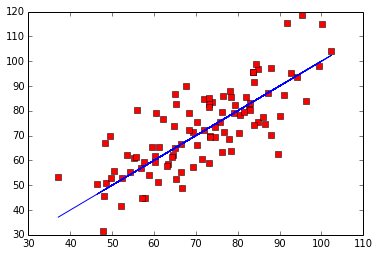

In [34]:
from single_variable import LinearRegression

values = np.genfromtxt('data/data.csv', delimiter = ',')
X = values.T[0]
y = values.T[1]

lr = LinearRegression(0.0001, 2.1)
lr.fit(X[:80], y[:80])
y_pred = lr.transform(X)
lr.plot(X, y, y_pred)

Since values first column is X and second column is y, we transpose and assign the rows accordingly. We then create the LinearRegression object, with its first parameter as its learning rate, and second parameter is the time till which our gradiant descent algorithm will run. Red dots are the observed value and the blue line is the best line that we just found! So if some unknown X is given we can approximetely deduce y from the line. As for every x we will get some unique value(i.e it is continuous) we say its Regression.
Congratulations we just created our first LinearRegression model. We can expand it into a multiple feature LinearRegression using the same idea. In the next book we will also calculate the standard error for our predicted values in a multiple feature dataset.